# Polynomial regression 

The example belows uses a temperature-energy dataset in order to illustrate how to perform a non linear regression.

Workflow:
1. Preparation
    - Extract the dataset from the _power_demand_vs_temperature.csv_ 
    - Explore the dataset and check for missing values
    - Plot the distribution
    - Divide the dataset into train and test 
    - Create an evaluation function
2. First experiment
    - Create a linear model 
    - Train the model on X_train and y_train
    - Evaluate the model on X_test and y_test
    - Visualize the prediction of the model
3. Second experiment
    - Create a polynomial regression model with degree 2
    - Train the model on X_train and y_train
    - Evaluate the model on X_test and y_test
    - Visualize the prediction of the model
4. Third experiment
    - repeat the steps done in the second experiment but with degree 3
5. Third experiment
    - repeat the steps done in the second experiment but with degree 4
6. Compare the evaluation of each model


In [2]:
# Code source: Filippo Orazi 
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold

random_state = 42 # this will be used to guarantee the repeatability of the experiment

## Dataset preparation

### Load the dataset from a `.csv` file
This cell allows full compatibility between execution in Google Colab and in local


In [3]:
try:
  import google.colab.files
  IN_COLAB = True
except:
  IN_COLAB = False
# from google.colab import files
if IN_COLAB:
    uploaded = files.upload()


The file must be available in the same directory, or uploaded in the Colab environment in the execution of the previous cell


In [4]:
dataset_url = "power_demand_vs_temperature.csv"
target = "demand"

df = pd.read_csv(dataset_url)
predictor = df.columns[2]

df.sample(10)

,date,demand,temp
604,2016-08-27,2.485344,31.1
257,2015-09-15,1.850538,26.1
89,2015-03-31,1.644422,15.0
312,2015-11-09,1.654473,13.3
518,2016-06-02,2.271809,27.8
555,2016-07-09,2.129388,27.8
344,2015-12-11,1.689721,16.1
1069,2017-12-05,1.700395,13.3
862,2017-05-12,1.491913,13.9
25,2015-01-26,1.957972,-1.7


Set the date column as index

In [5]:
df = df.set_index("date")
df.head()

,demand,temp
date,,
2015-01-01,1.736065,1.7
2015-01-02,1.831672,2.2
2015-01-03,1.714934,14.4
2015-01-04,1.628577,15.6
2015-01-05,2.045394,0.0


### Explore the dataset and check for missing values


In [6]:
df.describe()

,demand,temp
count,1096.000000,1096.000000
mean,1.831796,16.927737
std,0.329434,10.791581
min,1.316033,-15.000000
25%,1.581654,8.900000
50%,1.731479,18.900000
75%,2.024869,26.100000
max,2.804025,33.900000


In [7]:
print(f"{df.shape[0] - df.dropna().shape[0]} invalid rows")

0 invalid rows


### Create X and y 

In [8]:
X = df.drop(target, axis=1)
y = df[target]
X.shape, y.shape

((1096, 1), (1096,))

### Plot the distribution



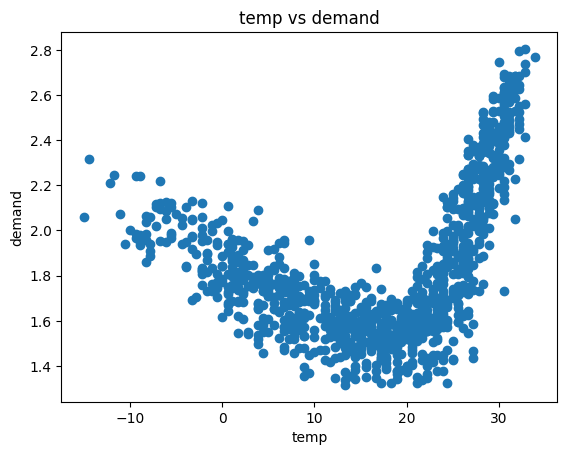

In [9]:
plt.scatter(X, y)
plt.xlabel(predictor)
plt.ylabel(target)
plt.title(f"{predictor} vs {target}")

plt.show()

### Divide the dataset in train and test splits

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_state, test_size=0.3)

X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((767, 1), (329, 1), (767,), (329,))

### Create an evaluation function to compute, print and return the metrics: rmse r2 f-statistic and p-value

In [10]:
# Computation of F-statistic and p-value for the regression
# http://facweb.cs.depaul.edu/sjost/csc423/documents/f-test-reg.htm


## First experiment
Create a linear model 

Train the model on X_train and y_train 

Evaluate the model on X_test and y_test


In [13]:
lin_estimator = linear_model.LinearRegression().fit(X_train, y_train)

# weight_uni = lin_estimator.coef_[0] # ho utilizzato solo una variabile e quindi ho solo un peso
# intercept = lin_estimator.intercept_
# print(f"intercetta: {intercept}, peso: {weight_uni}")

y_train_pred = lin_estimator.predict(X_train)
y_test_pred = lin_estimator.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print(f"MSE train: {mse_train}, MSE test: {mse_test}")
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print(f"R2 train: {r2_train}, R2 test: {r2_test}")

intercetta: 1.6501007676467756, peso: 0.010119362217596985
MSE train: 0.09055119878371369, MSE test: 0.10165083485105061
R2 train: 0.11352128714411502, R2 test: 0.16809034828105496


#### Visualize the prediction of the model 

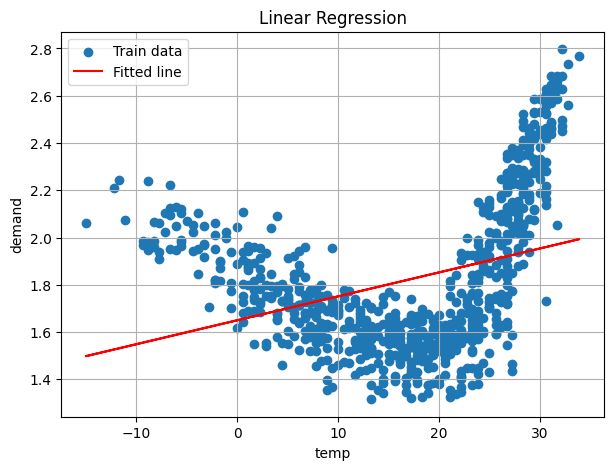

In [16]:
plt.figure(figsize=(7,5))

# scatter dati reali
plt.scatter(X_train, y_train, label="Train data")
# retta di regressione
plt.plot(X_train, y_train_pred, c="red", label="Fitted line")

plt.xlabel(predictor)
plt.ylabel(target)
plt.title("Linear Regression")
plt.legend()
plt.grid(True)

plt.show()

## Second experiment - Polynomial regression
We can clearly see that the linear regression model cannot really approximate the data distribution.

We can now try with a non linear regression model:
1. Use the sklearn fucntion _PolynomialFeature_ to create a new array of features. Set _degree=2_ and _include_bias=False_
2. Train a Linear regression model with the new features
3. Evaluate the model 
4. Visualize the predicted values of the model

#### Polynomial degree = 2

In [27]:
degree = 2
pol_feat = PolynomialFeatures(degree, include_bias=False)
X_train_poly = pol_feat.fit_transform(X_train)
X_test_poly = pol_feat.fit_transform(X_test)

lin_estimator = linear_model.LinearRegression().fit(X_train_poly, y_train)

# weight_uni = lin_estimator.coef_[0] # ho utilizzato solo una variabile e quindi ho solo un peso
# intercept = lin_estimator.intercept_
# print(f"intercetta: {intercept}, peso: {weight_uni}")

y_train_pred = lin_estimator.predict(X_train_poly)
y_test_pred = lin_estimator.predict(X_test_poly)

In [28]:
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print(f"MSE train: {mse_train}, MSE test: {mse_test}")
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print(f"R2 train: {r2_train}, R2 test: {r2_test}")

MSE train: 0.03406761338375413, MSE test: 0.03345625006863746
R2 train: 0.6664846576505621, R2 test: 0.7261943063900527


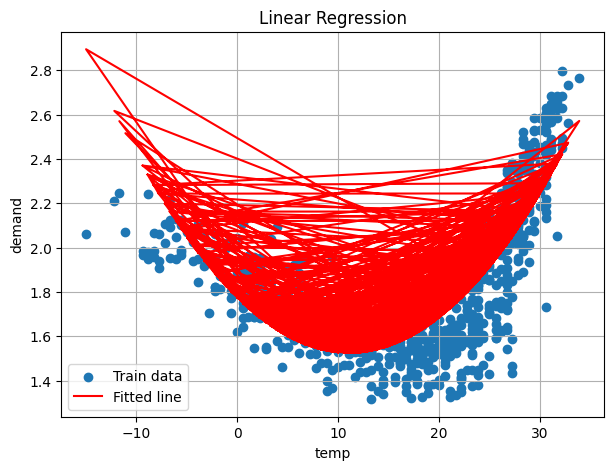

In [29]:
plt.figure(figsize=(7,5))

# scatter dati reali
plt.scatter(X_train, y_train, label="Train data")
# retta di regressione
plt.plot(X_train, y_train_pred, c="red", label="Fitted line")

plt.xlabel(predictor)
plt.ylabel(target)
plt.title("Linear Regression")
plt.legend()
plt.grid(True)

plt.show()

## Third experiment

#### Polynomial degree = 3

In [31]:
degree = 3
pol_feat = PolynomialFeatures(degree, include_bias=False)
X_train_poly = pol_feat.fit_transform(X_train)
X_test_poly = pol_feat.fit_transform(X_test)

lin_estimator = linear_model.LinearRegression().fit(X_train_poly, y_train)

# weight_uni = lin_estimator.coef_[0] # ho utilizzato solo una variabile e quindi ho solo un peso
# intercept = lin_estimator.intercept_
# print(f"intercetta: {intercept}, peso: {weight_uni}")

y_train_pred = lin_estimator.predict(X_train_poly)
y_test_pred = lin_estimator.predict(X_test_poly)

In [32]:
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print(f"MSE train: {mse_train}, MSE test: {mse_test}")
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print(f"R2 train: {r2_train}, R2 test: {r2_test}")

MSE train: 0.02230013472446957, MSE test: 0.02174941701778837
R2 train: 0.7816859965125482, R2 test: 0.8220029381670011


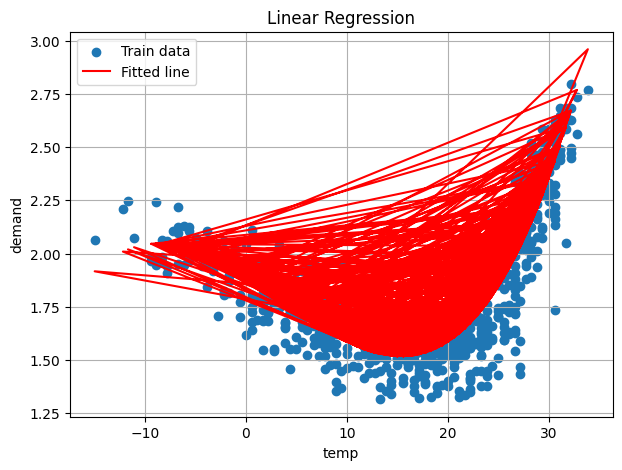

In [33]:
plt.figure(figsize=(7,5))

# scatter dati reali
plt.scatter(X_train, y_train, label="Train data")
# retta di regressione
plt.plot(X_train, y_train_pred, c="red", label="Fitted line")

plt.xlabel(predictor)
plt.ylabel(target)
plt.title("Linear Regression")
plt.legend()
plt.grid(True)

plt.show()

## Fourth experiment
### Polynomial degree = 4

In [34]:
degree = 4
pol_feat = PolynomialFeatures(degree, include_bias=False)
X_train_poly = pol_feat.fit_transform(X_train)
X_test_poly = pol_feat.fit_transform(X_test)

lin_estimator = linear_model.LinearRegression().fit(X_train_poly, y_train)

# weight_uni = lin_estimator.coef_[0] # ho utilizzato solo una variabile e quindi ho solo un peso
# intercept = lin_estimator.intercept_
# print(f"intercetta: {intercept}, peso: {weight_uni}")

y_train_pred = lin_estimator.predict(X_train_poly)
y_test_pred = lin_estimator.predict(X_test_poly)

In [35]:
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print(f"MSE train: {mse_train}, MSE test: {mse_test}")
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print(f"R2 train: {r2_train}, R2 test: {r2_test}")

MSE train: 0.02210160440047002, MSE test: 0.021333874235340146
R2 train: 0.7836295699654228, R2 test: 0.8254037371070921


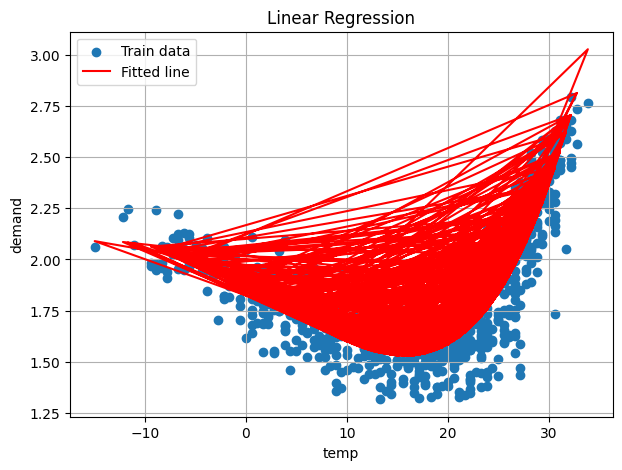

In [36]:
plt.figure(figsize=(7,5))

# scatter dati reali
plt.scatter(X_train, y_train, label="Train data")
# retta di regressione
plt.plot(X_train, y_train_pred, c="red", label="Fitted line")

plt.xlabel(predictor)
plt.ylabel(target)
plt.title("Linear Regression")
plt.legend()
plt.grid(True)

plt.show()

## Compare the performance of the four models

,linear,polynomial d = 2,polynomial d = 3,polynomial d = 4
rmse,1.001591e-01,3.345625e-02,2.174942e-02,2.133387e-02
r2,-5.366169e+00,5.756325e-01,7.843318e-01,7.923317e-01
f-statistic,5.327309e+01,3.848865e+02,5.023183e+02,3.900454e+02
p-value,2.219669e-12,1.110223e-16,1.110223e-16,1.110223e-16
